In [1]:
import os
from utils.config import PROJECT_DIR

os.chdir(PROJECT_DIR)

In [2]:
import torchvision
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.options.display.max_columns = None
from torchvision.transforms import transforms

In [3]:
from utils.config import DATA_DIR

In [4]:
#train_dataset=torchvision.datasets.MNIST('/data/task3', train=True, transforms=transforms.ToTensor(), download=True)
test_dataset=torchvision.datasets.MNIST(DATA_DIR / 'task3', train=False, transform=transforms.ToTensor(), download=True)

0.3%

100.0%


Extracting C:\Users\Maryia_Kazloutsava\quantum_tests\data\task3\MNIST\raw\train-images-idx3-ubyte.gz to C:\Users\Maryia_Kazloutsava\quantum_tests\data\task3\MNIST\raw



100.0%


Extracting C:\Users\Maryia_Kazloutsava\quantum_tests\data\task3\MNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\Maryia_Kazloutsava\quantum_tests\data\task3\MNIST\raw



100.0%


Extracting C:\Users\Maryia_Kazloutsava\quantum_tests\data\task3\MNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\Maryia_Kazloutsava\quantum_tests\data\task3\MNIST\raw



100.0%

Extracting C:\Users\Maryia_Kazloutsava\quantum_tests\data\task3\MNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\Maryia_Kazloutsava\quantum_tests\data\task3\MNIST\raw



In [5]:
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)

In [6]:
len(test_loader)

10000

In [11]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [14]:
example_data.shape

torch.Size([1, 1, 28, 28])

In [15]:
example_targets

tensor([4])

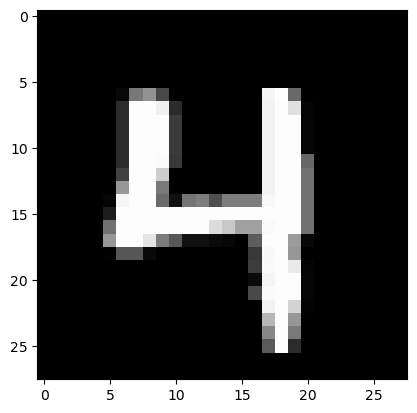

In [16]:
plt.imshow(example_data[0][0], cmap='gray', interpolation='none')

In [159]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from task3.models.base import DigitClassificationInterface


class Net(nn.Module, DigitClassificationInterface):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [24]:
network = Net()
#optimizer = optim.SGD(network.parameters(), lr=0.1)

In [76]:
output.data.max(1, keepdim=True)

torch.return_types.max(
values=tensor([[-2.1207]]),
indices=tensor([[6]]))

In [105]:
from torchvision.transforms.functional import center_crop
center_crop(data, [10, 10])[0].shape

#plt.imshow(center_crop(data, [10, 10])[0], cmap='gray', interpolation='none')

torch.Size([10, 10])

In [75]:
data, target = test_dataset[np.random.randint(0, len(test_dataset))]
target = torch.tensor([target])
output = network(data)
print(output)
test_loss += F.nll_loss(output, target, size_average=False).item()
pred = output.data.max(1, keepdim=True)[1]
print(pred)
print(target.data.view_as(pred))
correct += pred.eq(target.data.view_as(pred)).sum()

tensor([[-2.2927, -2.2466, -2.1517, -2.3986, -2.3551, -2.4602, -2.1207, -2.3024,
         -2.3690, -2.3830]], grad_fn=<LogSoftmaxBackward0>)
tensor([[6]])
tensor([[8]])


C:\Users\Maryia_Kazloutsava\AppData\Local\Temp\ipykernel_36876\66486561.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [142]:
output.data.max(1, keepdim=True)[1].reshape(-1)

tensor([6])

In [132]:
output.data.max(0, keepdim=True)

torch.return_types.max(
values=tensor([[-2.2927, -2.2466, -2.1517, -2.3986, -2.3551, -2.4602, -2.1207, -2.3024,
         -2.3690, -2.3830]]),
indices=tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

In [67]:

network.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = network(data)
        print(output)
        test_loss += F.nll_loss(output, target, size_average=False).item()
        pred = output.data.max(1, keepdim=True)[1]
        print(pred)
        print(target.data.view_as(pred))
        correct += pred.eq(target.data.view_as(pred)).sum()
        break

# test_loss /= len(test_loader.dataset)
# test_losses.append(test_loss)
# print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
#       test_loss, correct, len(test_loader.dataset),- 100. * correct / len(test_loader.dataset)))

tensor([[-2.2957, -2.2110, -2.1637, -2.4018, -2.3891, -2.4668, -2.1542, -2.2650,
         -2.3462, -2.3845]])
tensor([[6]])
tensor([[1]])


C:\Users\Maryia_Kazloutsava\AppData\Local\Temp\ipykernel_36876\66486561.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
C:\Users\Maryia_Kazloutsava\Anaconda3\envs\quantum_env\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [143]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)

In [156]:
clf.fit(np.random.randn(*torch.reshape(data, (1, -1)).numpy().shape), np.random.randint(0, 10, 1))

RandomForestClassifier(n_estimators=10)

In [157]:
clf.predict(torch.reshape(data, (1, -1)).numpy())

array([3])